# Comprehending the Problem Statement

### The situation is about a business problem that Boombikes is facing.

The company experienced a significant drop in revenue during the COVID lockdown and incurred losses. Now, the company aims to develop a robust business plan and has partnered with a consulting firm to analyze the demand patterns for bike sharing once the lockdown is lifted, with a specific focus on understanding the factors influencing this demand. 

In a nutshell, the deliverables by the consulting firm are as follows:

        • Which variables are significant in predicting the demand for shared bikes.
        • How well those variables describe the bike demands.

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression  
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels as sm 
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.metrics import r2_score

import calendar

import warnings 
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
bikes = pd.read_csv("day.csv")

## Read and Understand the Dataset

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikes.shape

(730, 16)

In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
len(bikes[bikes.duplicated()])

0

In [8]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


 ## Observation:
    
    • Dataset has 730 rows and 16 columns.
    • Except one column that is "dteday", all other are either float or integer type.
    • Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.
    • There are no missing / Null values.
    • There were zero duplicate values in the dataset.

## Data Cleaning

In [9]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

    • instant : Its only an index value

    • dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

    • casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation.

In [10]:
bike_new=bikes[['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
               'atemp', 'hum', 'windspeed','cnt']]

In [11]:
bike_new.shape

(730, 12)

    • Now, new Dataset has 730 rows and 12 columns.

#### Converting int64 to Categorical variables

    • season','mnth','weekday','weathersit' are catagorical variables not int64 hence convreting them to catagorical

#### Season

In [12]:
bike_new['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
bike_new['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

#### Month

In [13]:
bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])
bike_new['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

#### weekday

In [14]:
bike_new['weekday'].replace([1, 2, 3, 4, 5, 6, 0], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], inplace = True)
bike_new['weekday'].unique()

array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], dtype=object)

#### weather

In [15]:
bike_new['weathersit']=bike_new['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])
bike_new['weathersit'].value_counts()

Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: weathersit, dtype: int64

## Univariate Analysis

#### Numerical Variable

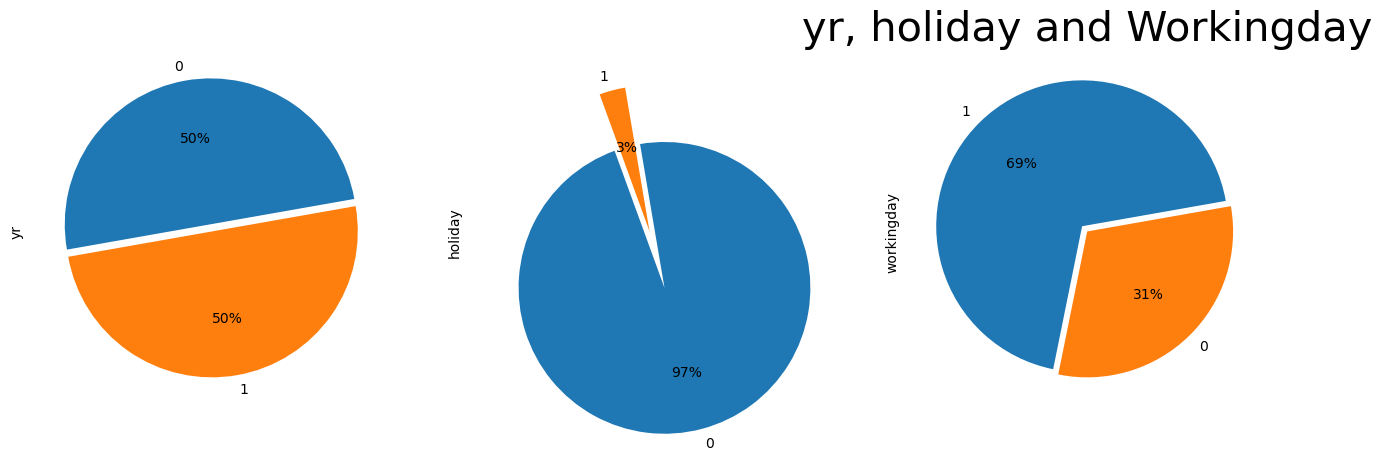

In [16]:
plt.figure(figsize = [16,15])

# Subplot 1 
plt.subplot(131)
bike_new['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)

# Subplot 2
plt.subplot(132) 
bike_new['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)

# Subplot 3
plt.subplot(133)
bike_new['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)

plt.title('yr, holiday and Workingday',fontsize=30)
plt.show()

By observing the 3 pi charts we can came to conclusion that

    • Yr is expected to be 50%-50% daily records of bike usage.
    • Significantly less number of holidays(1) as compared to non-holidays(0) hence bike usage is more in 0.
    • The same case applies to 'workingday' due to higher number of days vs non-working days.

#### Categorical Variabvles 

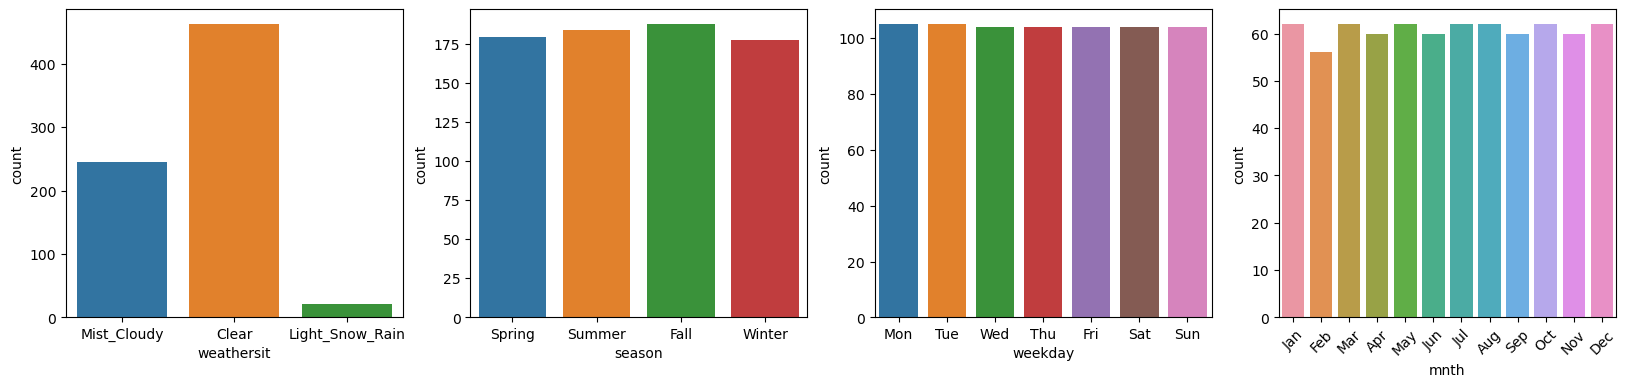

In [17]:
plt.figure(figsize = [20,4])

# Subplot 1
plt.subplot(141)
sns.countplot(data = bike_new, x = 'weathersit')

# Subplot 2
plt.subplot(142)
sns.countplot(data = bike_new, x = 'season')

# Subplot 3
plt.subplot(143)
sns.countplot(data = bike_new, x = 'weekday')

# Subplot 4
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = bike_new, x = 'mnth')

plt.show()

By observing the plots we can came to conclusion that

    • When 'weathersit' is Clear, Few clouds, Partly cloudy, Partly cloudy the bikes are usage are more.
    • The rest of the variables are shows very close values.

## Bivariatre Analysis

#### Visualizing Numerical Variables vs 'cnt'

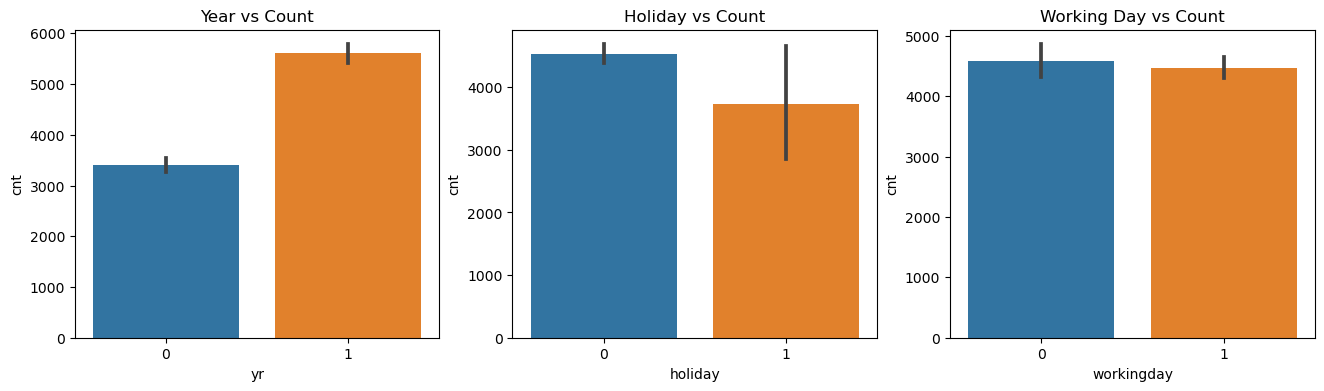

In [18]:
plt.figure(figsize=(16, 4))

# Subplot 1
plt.subplot(131)
sns.barplot(x='yr', y='cnt', data=bike_new)
plt.title('Year vs Count')

# Subplot 2
plt.subplot(132)
sns.barplot(x='holiday', y='cnt', data=bike_new)
plt.title('Holiday vs Count')

# Subplot 3
plt.subplot(133)
sns.barplot(x='workingday', y='cnt', data=bike_new)
plt.title('Working Day vs Count')

plt.show()

By observing the plots we can came to conclusion that

    • There is a increase in number of bike users from year 2018(0) to year 2019(1).
    • There are more users during holidays(0) as compared to Non holidays(1).
    • There is a very little discrepancy between users of BoomBike on a working day(1) and non-working day(0).

#### Visualizing Categorical Variables vs 'cnt'

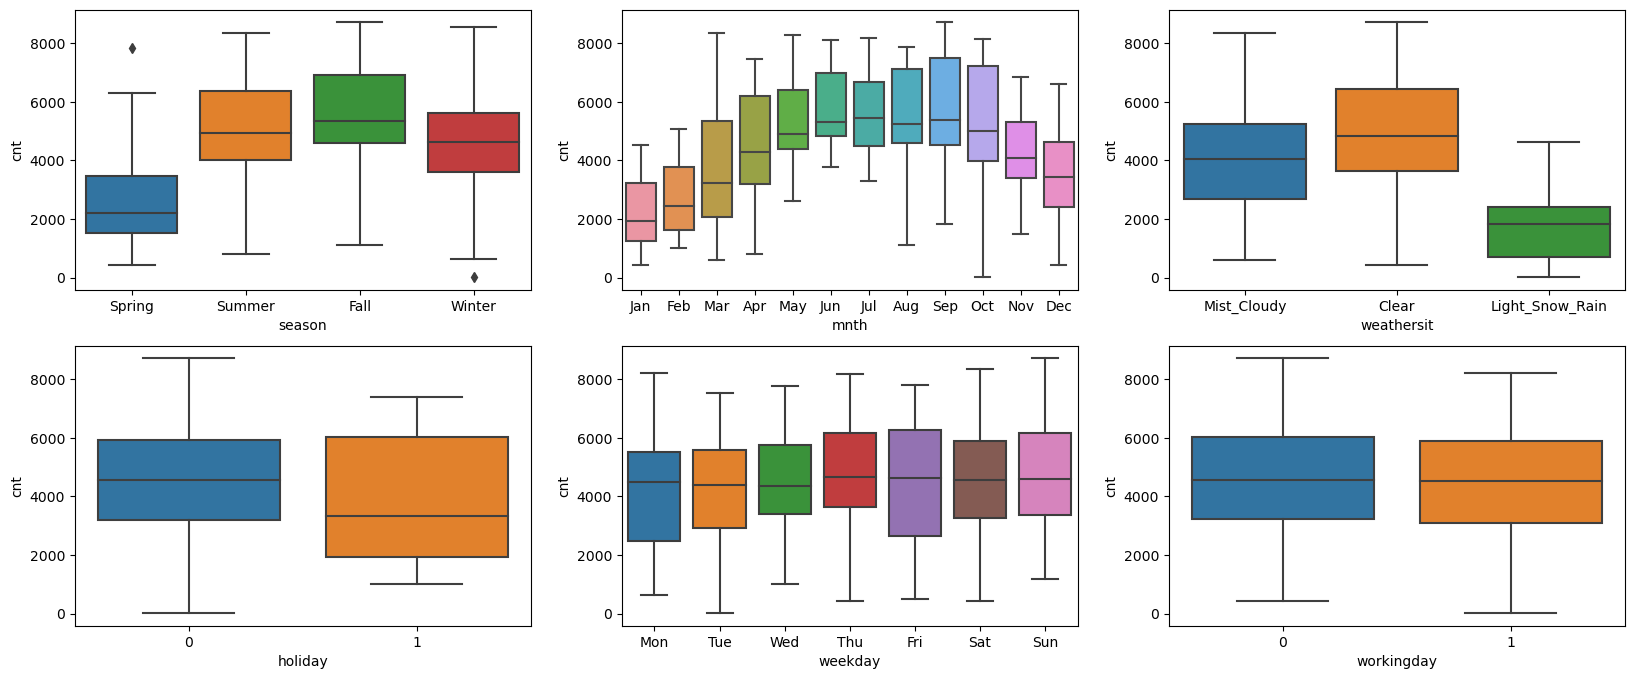

In [19]:
plt.figure(figsize=(20, 8))

# Subplot 1
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data =bike_new)

# Subplot 2
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data =bike_new)

# Subplot 3
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)

# Subplot 4
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data =bike_new)

# Subplot 5
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)

# Subplot 6
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)

plt.show()

**Insights:**

• There were 6 categorical variables in the dataset.

• We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

   • **season:** Almost 32% of the bike booking were happening in season3(fall) with a median of over 5000 booking (for the period of 2 years). This was followed by season2(summer) & season4(winter) with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

   • **mnth:** Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

   • **weathersit:** Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

   • **holiday:** Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

   • **weekday:** weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

   • **workingday:** Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variableWe used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .



## Correlation Matrix

In [20]:
bike_new.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


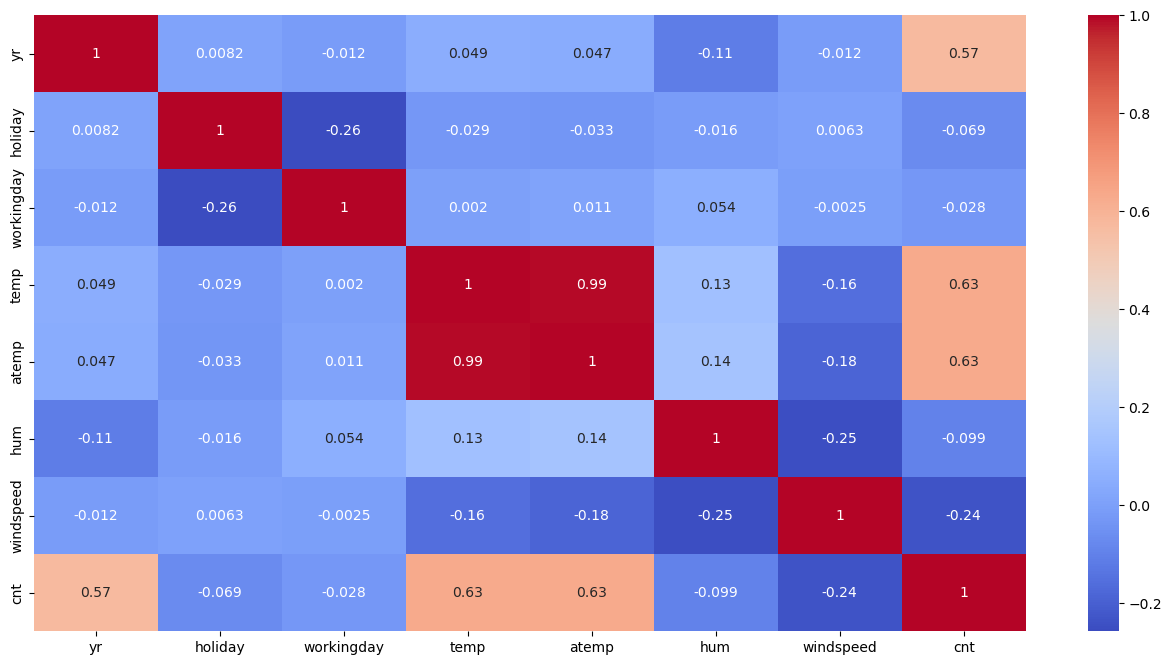

In [21]:
plt.figure(figsize = (16,8))
sns.heatmap(bike_new.corr(), annot = True, cmap="coolwarm")
plt.show()

**Insights:**

    • The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

    • We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## Creating Dummy Variables

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

This below code does 3 things:

    • Create Dummy variable.
    • Drop original variable for which the dummy was created.
    • Drop first dummy variable for each set of dummies created.

In [22]:
bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    uint8  
 9   season_Summer               730 non-null    uint8  
 10  season_Winter               730 non-null    uint8  
 11  mnth_Aug                    730 non-null    uint8  
 12  mnth_Dec                    730 non-null    uint8  
 13  mnth_Feb                    730 non

In [23]:
bike_new.shape

(730, 30)

In [24]:
bike_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Light_Snow_Rain', 'weathersit_Mist_Cloudy'],
      dtype='object')

## Split The Data

**Splitting the data to Train and Test :** 

    • We will now split the data into TRAIN and TEST (70:30 ratio) We will use train_test_split method from sklearn package for this.
    • We should specify 'random_state' so that the train and test data set always have the same rows, respectively.

In [25]:
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          510 non-null    int64  
 1   holiday                     510 non-null    int64  
 2   workingday                  510 non-null    int64  
 3   temp                        510 non-null    float64
 4   atemp                       510 non-null    float64
 5   hum                         510 non-null    float64
 6   windspeed                   510 non-null    float64
 7   cnt                         510 non-null    int64  
 8   season_Spring               510 non-null    uint8  
 9   season_Summer               510 non-null    uint8  
 10  season_Winter               510 non-null    uint8  
 11  mnth_Aug                    510 non-null    uint8  
 12  mnth_Dec                    510 non-null    uint8  
 13  mnth_Feb                    510 n

In [27]:
df_train.shape

(510, 30)

In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   cnt                         219 non-null    int64  
 8   season_Spring               219 non-null    uint8  
 9   season_Summer               219 non-null    uint8  
 10  season_Winter               219 non-null    uint8  
 11  mnth_Aug                    219 non-null    uint8  
 12  mnth_Dec                    219 non-null    uint8  
 13  mnth_Feb                    219 no

In [29]:
df_test.shape

(219, 30)

### Pair Plot

#### As per our previous obsevation we can say that 'temp', 'atemp', 'hum', 'windspeed','cnt' are the numerical variables.
#### Plot pair plot of Numeric Variables. 

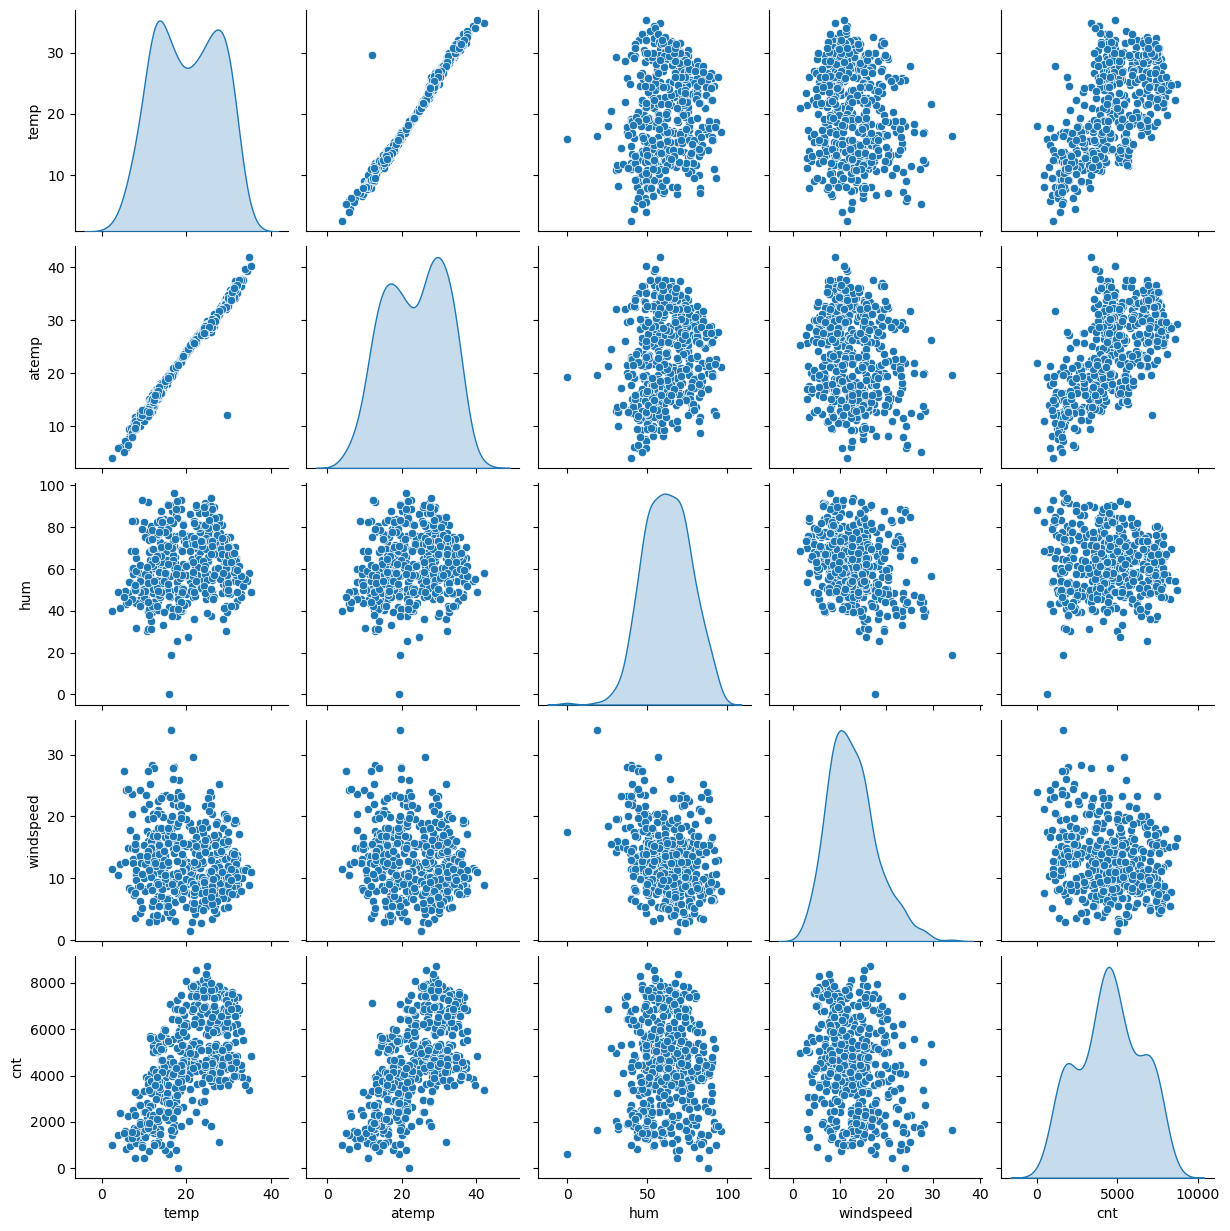

In [30]:
bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

    • By observing that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

### Correlation Matrix and Heatmap

In [31]:
bike_num.corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.989610,0.173758,-0.161614,0.627185
atemp,0.989610,1.000000,0.186440,-0.190693,0.630458
hum,0.173758,0.186440,1.000000,-0.281480,-0.059645
windspeed,-0.161614,-0.190693,-0.281480,1.000000,-0.239927
cnt,0.627185,0.630458,-0.059645,-0.239927,1.000000


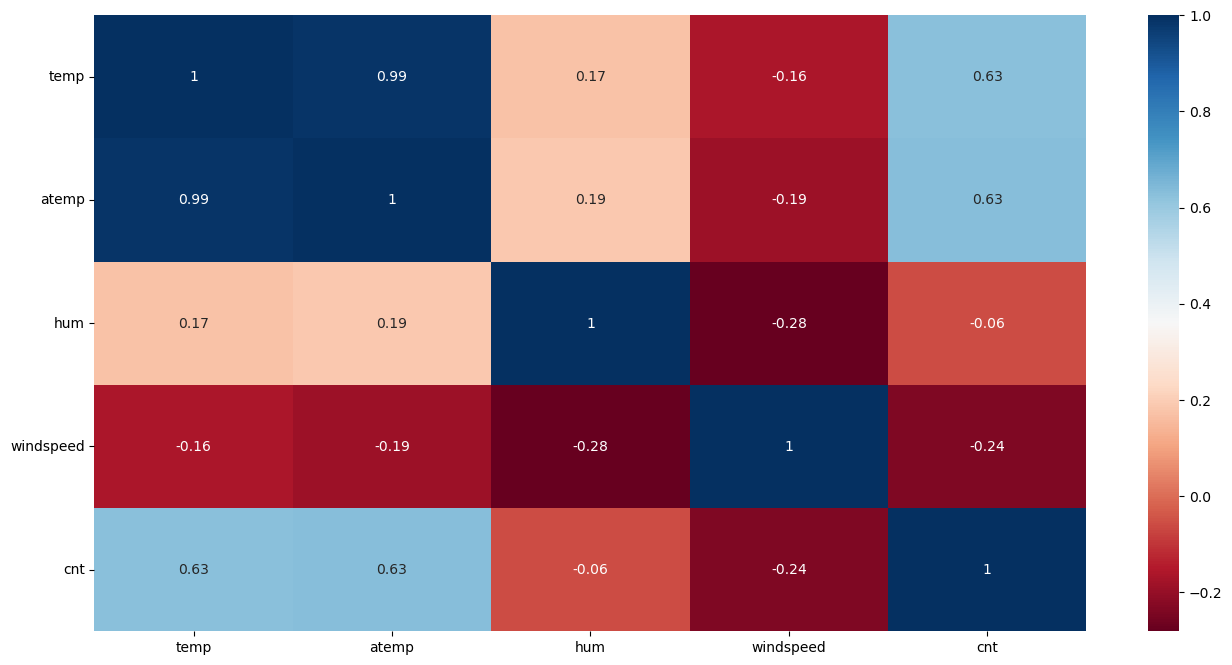

In [32]:
plt.figure(figsize = (16,8))
sns.heatmap(bike_num.corr(), annot = True, cmap="RdBu")
plt.yticks(rotation = 0)
plt.show()

    • By observing that there is a high correlation between 'temp','atemp' vs 'cnt'

## RESCALING THE FEATURES

In [33]:
scaler = MinMaxScaler()

#### Apply scaler() to all the numeric variables

In [34]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,1,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,1,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,0,0,0,0,1,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.692157,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.084314,0.082353,0.143137,0.143137,0.143137,0.139216,0.152941,0.131373,0.025490,0.341176
std,0.500487,0.151726,0.462054,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.278131,0.275172,0.350557,0.350557,0.350557,0.346511,0.360284,0.338139,0.157763,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building a Linear Model

#### Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

**RFE( Recursive feature elimination):** We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 13),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', True, 1),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 2),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Dec', 'mnth_Jul', 'mnth_Mar', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_Summer', 'mnth_Aug', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jun', 'mnth_May', 'mnth_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using STATS MODEL

# MODEL 1

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs (variance inflation factor)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,358.02
2,atemp,354.51
3,hum,22.80
4,windspeed,5.11
6,season_Winter,2.75
5,season_Spring,2.68
14,weathersit_Mist_Cloudy,2.27
0,yr,2.05
10,mnth_Nov,1.83
8,mnth_Jul,1.42


In [45]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [46]:
lr1.params

const                         0.360901
yr                            0.228716
temp                          0.295940
atemp                         0.166851
hum                          -0.166450
windspeed                    -0.180526
season_Spring                -0.124268
season_Winter                 0.076629
mnth_Dec                     -0.041307
mnth_Jul                     -0.051320
mnth_Mar                      0.045215
mnth_Nov                     -0.058705
mnth_Sep                      0.062326
weekday_Sat                   0.020677
weathersit_Light_Snow_Rain   -0.264216
weathersit_Mist_Cloudy       -0.048614
dtype: float64

In [47]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.1
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.78e-183
Time:                        18:01:58   Log-Likelihood:                 501.75
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     494   BIC:                            -903.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3609      0.033     10.863      0.000       0.296       0.426
yr                             0.2287      0.008     27.609      0.000       0.212       0.245
temp                           0.2959      0.131      2.253      0.025       0.038       0.554
atemp                          0.1669      0.138      1.211      0.227      -0.104       0.438
hum                           -0.1664      0.038     -4.362      0.000      -0.241      -0.091
windspeed                     -0.1805      0.028     -6.386      0.000      -0.236      -0.125
season_Spring                 -0.1243      0.016     -8.014      0.000      -0.155      -0.094
season_Winter                  0.0766      0.014      5.373      0.000       0.049       0.105
mnth_Dec                      -0.0413      0.017     -2.362      0.019      -0.076      -0.007
mnth_Jul                      -0.0513      0.017     -2.964      0.003      -0.085      -0.017
mnth_Mar                       0.0452      0.016      2.792      0.005       0.013       0.077
mnth_Nov                      -0.0587      0.019     -3.101      0.002      -0.096      -0.022
mnth_Sep                       0.0623      0.016      3.972      0.000       0.031       0.093
weekday_Sat                    0.0207      0.012      1.753      0.080      -0.003       0.044
weathersit_Light_Snow_Rain    -0.2642      0.029     -9.179      0.000      -0.321      -0.208
weathersit_Mist_Cloudy        -0.0486      0.011     -4.481      0.000      -0.070      -0.027
==============================================================================
Omnibus:                       76.273   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.238
Skew:                          -0.788   Prob(JB):                     3.26e-39
Kurtosis:                       5.421   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 2

    • Removing the variable 'atemp' based on its Very High 'VIF' value.
    • Even though the VIF of atemp is second highest, we decided to drop 'atemp' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [48]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.37
1,temp,15.94
3,windspeed,4.99
5,season_Winter,2.72
4,season_Spring,2.67
13,weathersit_Mist_Cloudy,2.26
0,yr,2.05
9,mnth_Nov,1.83
7,mnth_Jul,1.42
6,mnth_Dec,1.41


In [50]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [51]:
lr2.params

const                         0.364321
yr                            0.228737
temp                          0.450107
hum                          -0.164140
windspeed                    -0.186426
season_Spring                -0.124742
season_Winter                 0.077938
mnth_Dec                     -0.041343
mnth_Jul                     -0.051534
mnth_Mar                      0.046173
mnth_Nov                     -0.059310
mnth_Sep                      0.061282
weekday_Sat                   0.019274
weathersit_Light_Snow_Rain   -0.265385
weathersit_Mist_Cloudy       -0.048974
dtype: float64

In [52]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     180.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.68e-184
Time:                        18:01:58   Log-Likelihood:                 501.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     495   BIC:                            -908.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3643      0.033     11.000      0.000       0.299       0.429
yr                             0.2287      0.008     27.599      0.000       0.212       0.245
temp                           0.4501      0.032     13.997      0.000       0.387       0.513
hum                           -0.1641      0.038     -4.305      0.000      -0.239      -0.089
windspeed                     -0.1864      0.028     -6.692      0.000      -0.241      -0.132
season_Spring                 -0.1247      0.016     -8.043      0.000      -0.155      -0.094
season_Winter                  0.0779      0.014      5.478      0.000       0.050       0.106
mnth_Dec                      -0.0413      0.017     -2.363      0.019      -0.076      -0.007
mnth_Jul                      -0.0515      0.017     -2.975      0.003      -0.086      -0.018
mnth_Mar                       0.0462      0.016      2.853      0.005       0.014       0.078
mnth_Nov                      -0.0593      0.019     -3.132      0.002      -0.097      -0.022
mnth_Sep                       0.0613      0.016      3.909      0.000       0.030       0.092
weekday_Sat                    0.0193      0.012      1.641      0.101      -0.004       0.042
weathersit_Light_Snow_Rain    -0.2654      0.029     -9.221      0.000      -0.322      -0.209
weathersit_Mist_Cloudy        -0.0490      0.011     -4.514      0.000      -0.070      -0.028
==============================================================================
Omnibus:                       74.382   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.578
Skew:                          -0.770   Prob(JB):                     3.35e-38
Kurtosis:                       5.398   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 3

    • Removing the variable 'hum' based on its Very High 'VIF' value.

In [53]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.21
2,windspeed,4.96
4,season_Winter,2.35
0,yr,2.04
3,season_Spring,1.89
8,mnth_Nov,1.80
12,weathersit_Mist_Cloudy,1.53
6,mnth_Jul,1.38
5,mnth_Dec,1.34
7,mnth_Mar,1.22


In [55]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [56]:
lr3.params

const                         0.271706
yr                            0.232890
temp                          0.421391
windspeed                    -0.152403
season_Spring                -0.126296
season_Winter                 0.072348
mnth_Dec                     -0.050575
mnth_Jul                     -0.044304
mnth_Mar                      0.051708
mnth_Nov                     -0.059213
mnth_Sep                      0.056324
weekday_Sat                   0.022151
weathersit_Light_Snow_Rain   -0.314265
weathersit_Mist_Cloudy       -0.076256
dtype: float64

In [57]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     186.8
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.64e-181
Time:                        18:01:59   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     496   BIC:                            -896.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2717      0.026     10.605      0.000       0.221       0.322
yr                             0.2329      0.008     27.805      0.000       0.216       0.249
temp                           0.4214      0.032     13.165      0.000       0.359       0.484
windspeed                     -0.1524      0.027     -5.607      0.000      -0.206      -0.099
season_Spring                 -0.1263      0.016     -8.005      0.000      -0.157      -0.095
season_Winter                  0.0723      0.014      5.019      0.000       0.044       0.101
mnth_Dec                      -0.0506      0.018     -2.863      0.004      -0.085      -0.016
mnth_Jul                      -0.0443      0.018     -2.526      0.012      -0.079      -0.010
mnth_Mar                       0.0517      0.016      3.150      0.002       0.019       0.084
mnth_Nov                      -0.0592      0.019     -3.073      0.002      -0.097      -0.021
mnth_Sep                       0.0563      0.016      3.541      0.000       0.025       0.088
weekday_Sat                    0.0222      0.012      1.856      0.064      -0.001       0.046
weathersit_Light_Snow_Rain    -0.3143      0.027    -11.679      0.000      -0.367      -0.261
weathersit_Mist_Cloudy        -0.0763      0.009     -8.511      0.000      -0.094      -0.059
==============================================================================
Omnibus:                       74.573   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.112
Skew:                          -0.770   Prob(JB):                     1.56e-38
Kurtosis:                       5.413   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 4

    • Removing the variable windspeed based on its Very High 'VIF' value.
    • Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [58]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.96
3,season_Winter,2.34
0,yr,2.03
7,mnth_Nov,1.75
11,weathersit_Mist_Cloudy,1.53
2,season_Spring,1.43
5,mnth_Jul,1.35
4,mnth_Dec,1.34
6,mnth_Mar,1.22
8,mnth_Sep,1.21


In [60]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [61]:
lr4.params

const                         0.206237
yr                            0.230592
temp                          0.439286
season_Spring                -0.126553
season_Winter                 0.085062
mnth_Dec                     -0.045120
mnth_Jul                     -0.037879
mnth_Mar                      0.051301
mnth_Nov                     -0.065160
mnth_Sep                      0.062756
weekday_Sat                   0.022188
weathersit_Light_Snow_Rain   -0.330410
weathersit_Mist_Cloudy       -0.074317
dtype: float64

In [62]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.2
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          4.54e-176
Time:                        18:01:59   Log-Likelihood:                 475.95
No. Observations:                 510   AIC:                            -925.9
Df Residuals:                     497   BIC:                            -870.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2062      0.023      8.779      0.000       0.160       0.252
yr                             0.2306      0.009     26.757      0.000       0.214       0.248
temp                           0.4393      0.033     13.389      0.000       0.375       0.504
season_Spring                 -0.1266      0.016     -7.787      0.000      -0.158      -0.095
season_Winter                  0.0851      0.015      5.800      0.000       0.056       0.114
mnth_Dec                      -0.0451      0.018     -2.483      0.013      -0.081      -0.009
mnth_Jul                      -0.0379      0.018     -2.101      0.036      -0.073      -0.002
mnth_Mar                       0.0513      0.017      3.033      0.003       0.018       0.085
mnth_Nov                      -0.0652      0.020     -3.288      0.001      -0.104      -0.026
mnth_Sep                       0.0628      0.016      3.839      0.000       0.031       0.095
weekday_Sat                    0.0222      0.012      1.805      0.072      -0.002       0.046
weathersit_Light_Snow_Rain    -0.3304      0.028    -11.988      0.000      -0.385      -0.276
weathersit_Mist_Cloudy        -0.0743      0.009     -8.057      0.000      -0.092      -0.056
==============================================================================
Omnibus:                       76.679   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.059
Skew:                          -0.777   Prob(JB):                     3.96e-41
Kurtosis:                       5.519   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 5

    • All Variables VIF values are well below 5. The 'weekday_Sat' variable having its High P-value 0.072 which is above to 0.05 hence I drop this variable.

In [63]:
X_train_new = X_train_new.drop(["weekday_Sat"], axis = 1)

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.86
3,season_Winter,2.34
0,yr,2.02
7,mnth_Nov,1.75
10,weathersit_Mist_Cloudy,1.52
2,season_Spring,1.43
4,mnth_Dec,1.34
5,mnth_Jul,1.34
6,mnth_Mar,1.21
8,mnth_Sep,1.21


In [65]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [66]:
lr5.params

const                         0.208006
yr                            0.231005
temp                          0.441121
season_Spring                -0.127178
season_Winter                 0.084582
mnth_Dec                     -0.044165
mnth_Jul                     -0.039964
mnth_Mar                      0.053580
mnth_Nov                     -0.064146
mnth_Sep                      0.062380
weathersit_Light_Snow_Rain   -0.328180
weathersit_Mist_Cloudy       -0.073507
dtype: float64

In [67]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.56e-176
Time:                        18:01:59   Log-Likelihood:                 474.29
No. Observations:                 510   AIC:                            -924.6
Df Residuals:                     498   BIC:                            -873.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2080      0.024      8.842      0.000       0.162       0.254
yr                             0.2310      0.009     26.754      0.000       0.214       0.248
temp                           0.4411      0.033     13.421      0.000       0.377       0.506
season_Spring                 -0.1272      0.016     -7.809      0.000      -0.159      -0.095
season_Winter                  0.0846      0.015      5.755      0.000       0.056       0.113
mnth_Dec                      -0.0442      0.018     -2.426      0.016      -0.080      -0.008
mnth_Jul                      -0.0400      0.018     -2.216      0.027      -0.075      -0.005
mnth_Mar                       0.0536      0.017      3.170      0.002       0.020       0.087
mnth_Nov                      -0.0641      0.020     -3.231      0.001      -0.103      -0.025
mnth_Sep                       0.0624      0.016      3.808      0.000       0.030       0.095
weathersit_Light_Snow_Rain    -0.3282      0.028    -11.892      0.000      -0.382      -0.274
weathersit_Mist_Cloudy        -0.0735      0.009     -7.961      0.000      -0.092      -0.055
==============================================================================
Omnibus:                       78.018   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.521
Skew:                          -0.787   Prob(JB):                     4.26e-42
Kurtosis:                       5.547   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    • This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

# Final Model Interpretation

Hypothesis Testing:
Hypothesis testing states that:

H0 (Null Hypothesis): B1 = B2 = ... = Bn = 0

H1 (Alternative Hypothesis): At least one coefficient (Bi) is not equal to 0
    
lr5 model coefficient values

const = 0.2080

yr = 0.2310

temp = 0.4411

season_Spring = -0.1272

season_Winter = 0.0846

mnth_Dec = -0.0442

mnth_Jul = -0.0400

mnth_Mar = 0.0536

mnth_Nov = -0.0641

mnth_Sep = 0.0624

weathersit_Light_Snow_Rain = -0.3282

weathersit_Mist_Cloudy = -0.0735

    • From the lr5 model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS

F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 204.1
Prob (F-statistic): 1.56e-176
The F-Statistics value are 204.1 (which is greater than 1) and the p-value of all the variables are '0.000' or close to 0.000 which is also well below 0.05 it states that the overall model is significant.


## The equation of best fitted surface based on model lr5:

**cnt = 0.2080 + (yr × 0.2310) + (temp × 0.4411) - (season_Spring × 0.1272) + (season_Winter × 0.0846) - (mnth_Dec × 0.0442) - (mnth_Jul × 0.0400) + (mnth_Mar × 0.0536) - (mnth_Nov × 0.0641) + (mnth_Sep × 0.0624) − (weathersit_Light_Snow_Rain × 0.3282) − (weathersit_Mist_Cloudy × 0.0735)**

## Interpretation of Coefficients 

This is similar to equation: Y = B0 + B1x1 + B2X2 ...Bn*Xn

where:

    • If Positive sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), increases the bike hire numbers by (B1,B2,B3...Bn) units.

    • If Negative sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), decreases the bike hire numbers by (B1,B2,B3...Bn) units.

    • const: The Constant value of ‘0.2080’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.2080 units.

# Assumptions 

Error terms are normally distributed with mean zero (not X, Y)

    • Residual Analysis of Training Data
    

In [68]:
y_train_pred = lr5.predict(X_train_lm5)

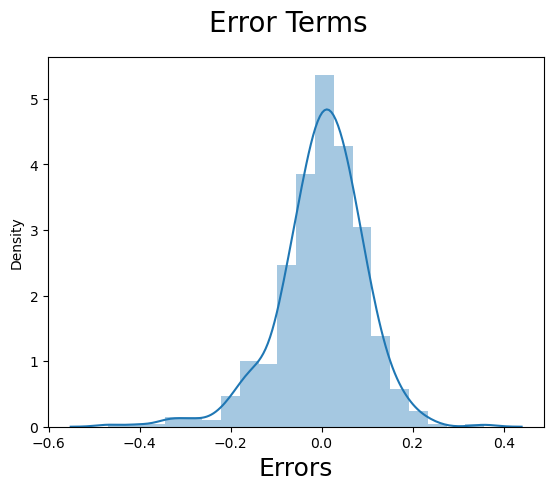

In [69]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

plt.show()

• From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### There is a Linear Relationship between X and Y

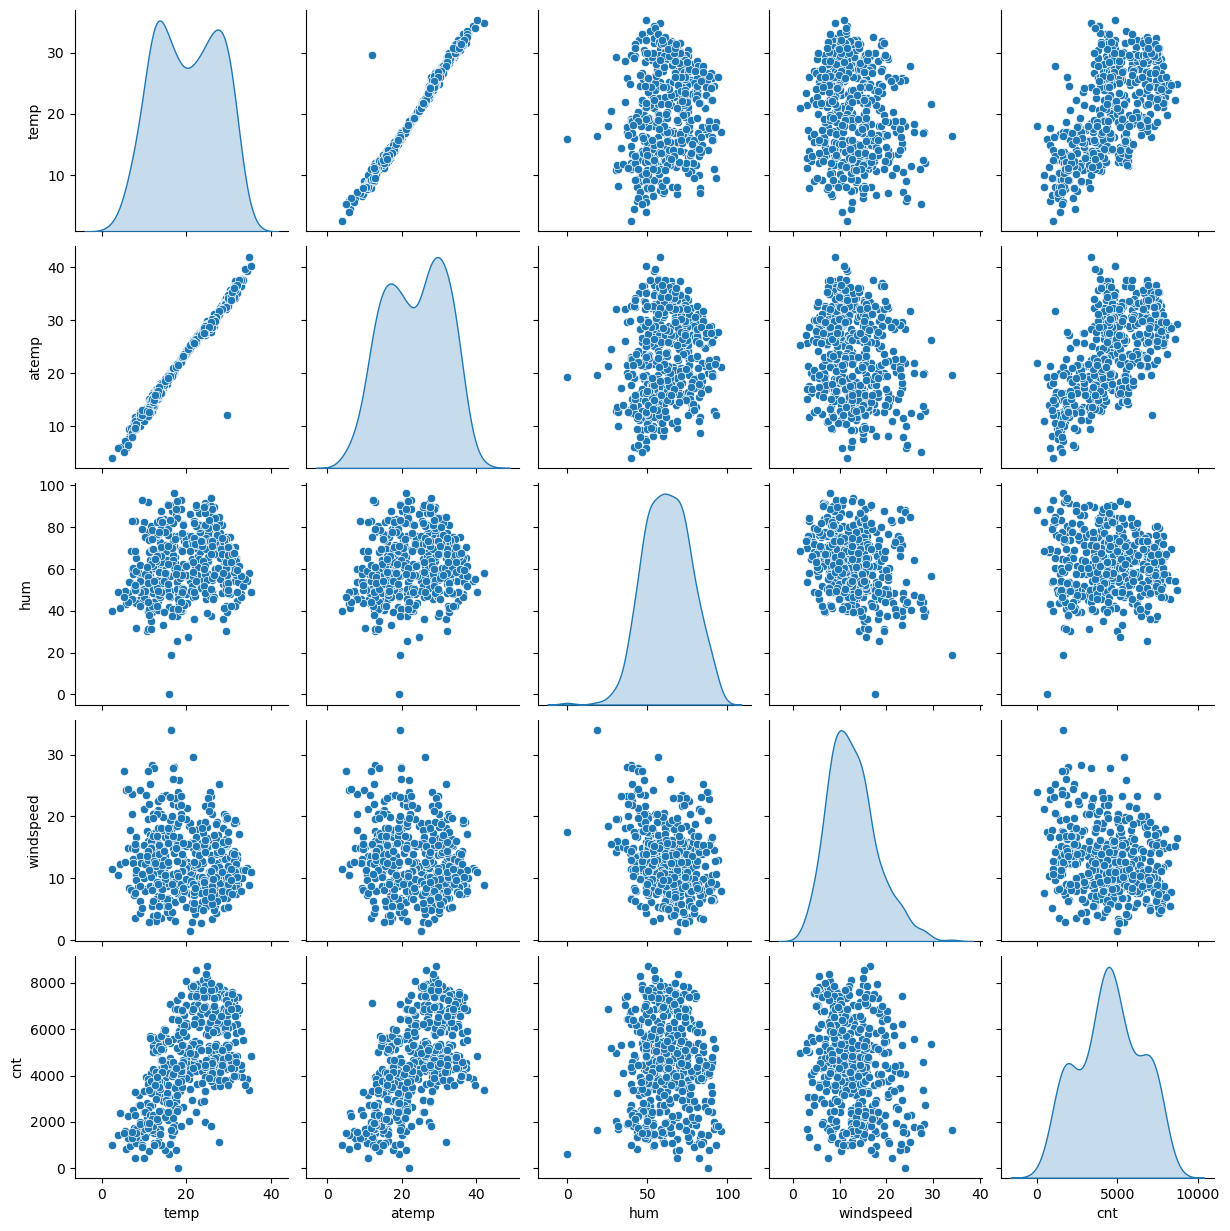

In [70]:
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

    • Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

### There is No Multicollinearity between the predictor variables

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.86
3,season_Winter,2.34
0,yr,2.02
7,mnth_Nov,1.75
10,weathersit_Mist_Cloudy,1.52
2,season_Spring,1.43
4,mnth_Dec,1.34
5,mnth_Jul,1.34
6,mnth_Mar,1.21
8,mnth_Sep,1.21


    • From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr5)

#### Apply the scaling on the test sets

In [72]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,1,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,1,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,0,1,0,0,0,1


In [74]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.689498,0.551225,0.527528,0.662567,0.346706,0.518889,0.237443,0.264840,...,0.086758,0.082192,0.146119,0.141553,0.136986,0.150685,0.123288,0.168950,0.036530,0.324201
std,0.501098,0.198967,0.463759,0.229463,0.215434,0.143562,0.159553,0.219953,0.426491,0.442259,...,0.282125,0.275286,0.354034,0.349389,0.344621,0.358561,0.329520,0.375566,0.188034,0.469148
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Devide into X_test and y_test

In [75]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          219 non-null    int64  
 1   holiday                     219 non-null    int64  
 2   workingday                  219 non-null    int64  
 3   temp                        219 non-null    float64
 4   atemp                       219 non-null    float64
 5   hum                         219 non-null    float64
 6   windspeed                   219 non-null    float64
 7   season_Spring               219 non-null    uint8  
 8   season_Summer               219 non-null    uint8  
 9   season_Winter               219 non-null    uint8  
 10  mnth_Aug                    219 non-null    uint8  
 11  mnth_Dec                    219 non-null    uint8  
 12  mnth_Feb                    219 non-null    uint8  
 13  mnth_Jan                    219 no

In [76]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   season_Spring               219 non-null    uint8  
 4   season_Winter               219 non-null    uint8  
 5   mnth_Dec                    219 non-null    uint8  
 6   mnth_Jul                    219 non-null    uint8  
 7   mnth_Mar                    219 non-null    uint8  
 8   mnth_Nov                    219 non-null    uint8  
 9   mnth_Sep                    219 non-null    uint8  
 10  weathersit_Light_Snow_Rain  219 non-null    uint8  
 11  weathersit_Mist_Cloudy      219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(9)
memory usage: 8.8 KB


In [77]:
# Making predictions using the final model (lr5)

y_pred = lr5.predict(X_test_lm5)

In [78]:
y_pred

22     0.101380
468    0.678591
553    0.818640
504    0.747756
353    0.354491
         ...   
237    0.560265
611    0.867851
258    0.422260
518    0.737679
313    0.331304
Length: 219, dtype: float64

# MODEL EVALUATION

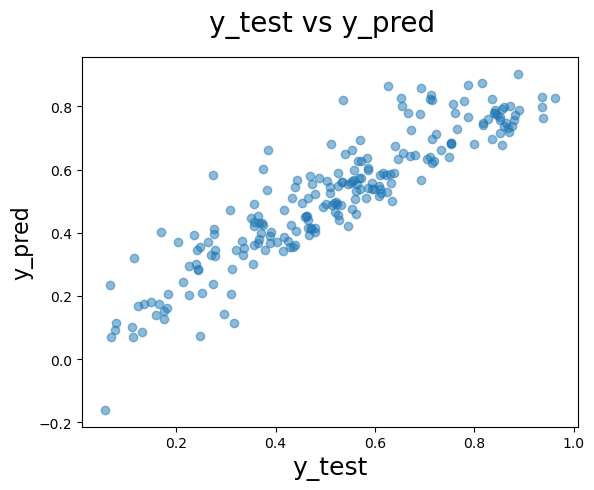

In [79]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 Value for TEST

In [80]:
r2_score(y_test, y_pred)

0.8246024047678727

## Adjusted R^2 Value for TEST

In [81]:
r2 = 0.8246024047678727

# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8152817596106099

# Final Result Comparison

• Train R^2 :0.818

• Train Adjusted R^2 :0.814

• Test R^2 :0.824

• Test Adjusted R^2 :0.815

• This seems to be a really good model that can very well 'Generalize' various datasets.

In [82]:
r2_train=0.818
r2_test=0.824
print('Difference in r2 Score(%)',(-r2_train + r2_test)*100)

Difference in r2 Score(%) 0.6000000000000005


In [83]:
Train_Adjusted_R2 = 0.814
Test_Adjusted_R2 = 0.815
print('Difference in Adjusted_R2 Score(%)',(-Train_Adjusted_R2+Test_Adjusted_R2)*100)

Difference in Adjusted_R2 Score(%) 0.10000000000000009


# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are:

    • Temperature (temp) - A coefficient value of ‘ 0.4411’ indicated that a unit increase in temp variable increases the bike hire numbers by  0.4411 units.

    • weathersit_Light_Snow_Rain - A coefficient value of ‘-0.3282’ indicated that, w.r.t weathersit_Light_Snow_Rain, a unit increase in weathersit_Light_Snow_Rain variable decreases the bike hire numbers by 0.3282 units.

    • Year (yr) - A coefficient value of ‘0.2310’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2310 units.

So, it's suggested to consider these variables utmost importance while planning, to achieve maximum Booking